# **Evaluate Grouping Model**

In [ ]:
model_w2v.eval()

all_preds = []
all_labels = []

with torch.no_grad():
    for x, y in val_loader_w2v:
        x = x.to(device)

        outputs = model_w2v(x)
        preds = outputs.argmax(1).cpu().numpy()

        all_preds.extend(preds)
        all_labels.extend(y.numpy())

all_preds = np.array(all_preds)
all_labels = np.array(all_labels)

val_acc = accuracy_score(all_labels, all_preds)
val_f1 = f1_score(all_labels, all_preds, average="macro")

print("Validation Accuracy:", val_acc)
print("Validation Macro F1:", val_f1)

Validation Accuracy: 0.1029043565348022
Validation Macro F1: 0.023325766174801362


In [ ]:
print("\nClassification Report:")
print(classification_report(val_labels, val_preds, target_names=le.classes_))


Classification Report:
              precision    recall  f1-score   support

      middle       0.73      0.73      0.73      4713
      senior       0.39      0.30      0.34       493
       young       0.62      0.64      0.63      2782

    accuracy                           0.67      7988
   macro avg       0.58      0.56      0.56      7988
weighted avg       0.67      0.67      0.67      7988



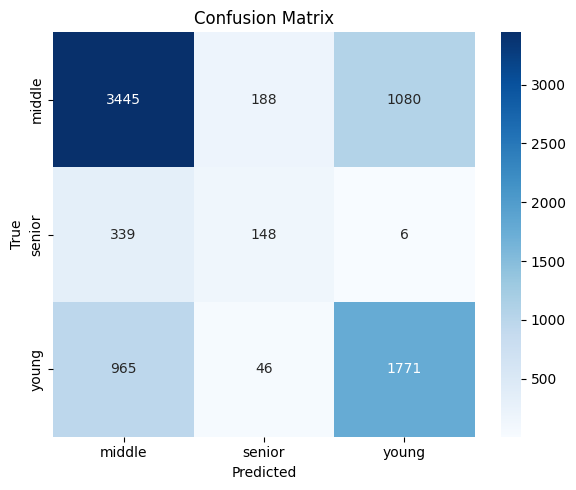

In [ ]:
cm = confusion_matrix(val_labels, val_preds)

plt.figure(figsize=(6,5))
sns.heatmap(cm,
            annot=True,
            fmt="d",
            xticklabels=le.classes_,
            yticklabels=le.classes_,
            cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()